<div align ="center">
    <h1>Industry Wise Sanctions For The Year 2023-2024</h1>
</div>


<div align ="center">
    <h1>Source:data.gov.in</h1>
</div>

# Domain Knowledge

## Understanding the Dataset:
### This dataset contains financial information for various industries, possibly collected by a government or economic authority, showcasing the financial performance or revenue generation (in Rs crore) of different industry sectors for a particular fiscal year (possibly 2023–24, based on the filename sactione.csv).

## Industry Domain Overview:
## Industries in this dataset may include sectors like:
### Manufacturing, Agriculture, Information Technology, Construction, Mining, Services, Retail, Healthcare, Education, etc.
### Each industry contributes differently to the gross domestic product (GDP) and economic development of a region or country.
## The financial figures (Rs in crore) represent:
### Revenue generated,
### Government expenditure, or
### Investments made in those industries (based on context and source).

In [15]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("IndustryWiseSanctions") \
    .getOrCreate()

print("PySpark Initialized Successfully")
spark


PySpark Initialized Successfully


In [16]:
df = spark.read.csv("Sanction.csv", 
                    header=True, 
                    inferSchema=True)
df.show(5)
df.printSchema()

+-----+--------------------+-----------+----+----+----+----+----+
|Sl No|            Industry|Rs in crore| _c3| _c4| _c5| _c6| _c7|
+-----+--------------------+-----------+----+----+----+----+----+
|    1|Hotel / Restauran...|     151.81|NULL|NULL|NULL|NULL|NULL|
|    2|       Health Sector|      84.83|NULL|NULL|NULL|NULL|NULL|
|    3|Construction acti...|      36.61|NULL|NULL|NULL|NULL|NULL|
|    4|    Food & Beverages|      81.87|NULL|NULL|NULL|NULL|NULL|
|    5|        Engineering |     128.69|NULL|NULL|NULL|NULL|NULL|
+-----+--------------------+-----------+----+----+----+----+----+
only showing top 5 rows

root
 |-- Sl No: integer (nullable = true)
 |-- Industry: string (nullable = true)
 |-- Rs in crore: double (nullable = true)
 |-- _c3: string (nullable = true)
 |-- _c4: string (nullable = true)
 |-- _c5: string (nullable = true)
 |-- _c6: string (nullable = true)
 |-- _c7: string (nullable = true)



#### Load the dataset from the given path for futhur analysics


In [17]:
from pyspark.sql.functions import col, sum
df.select([sum(col(c).isNull().cast("int")).alias(c) for c in df.columns]).show()
row_count = df.count()
col_count = len(df.columns)
print(f"Total Rows: {row_count}")
print(f"Total Columns: {col_count}")

+-----+--------+-----------+---+---+---+---+---+
|Sl No|Industry|Rs in crore|_c3|_c4|_c5|_c6|_c7|
+-----+--------+-----------+---+---+---+---+---+
|   30|      30|         30| 46| 46| 46| 46| 46|
+-----+--------+-----------+---+---+---+---+---+

Total Rows: 46
Total Columns: 8


#### Display basic information of the dataset

In [18]:
df = df.drop('_c3', '_c4','_c5','_c6','_c7')

#### Cleaning  the dataset by removing empty columns 

In [19]:
df = df.na.drop(subset=['Industry'])
print("Rows after dropping nulls in Industry column:", df.count())

df.select([sum(col(c).isNull().cast("int")).alias(c) for c in df.columns]).show()



Rows after dropping nulls in Industry column: 16
+-----+--------+-----------+
|Sl No|Industry|Rs in crore|
+-----+--------+-----------+
|    0|       0|          0|
+-----+--------+-----------+



#### Clean the dataset by removing empty rows.

In [20]:
df.show(5)

+-----+--------------------+-----------+
|Sl No|            Industry|Rs in crore|
+-----+--------------------+-----------+
|    1|Hotel / Restauran...|     151.81|
|    2|       Health Sector|      84.83|
|    3|Construction acti...|      36.61|
|    4|    Food & Beverages|      81.87|
|    5|        Engineering |     128.69|
+-----+--------------------+-----------+
only showing top 5 rows



#### Displaying  basic information of the dataset after Cleaning

In [21]:
pandas_df = df.toPandas()

In [22]:
df.toPandas().head()

,Sl No,Industry,Rs in crore
0,1,Hotel / Restaurant etc.,151.81
1,2,Health Sector,84.83
2,3,Construction activity (CRE),36.61
3,4,Food & Beverages,81.87
4,5,Engineering,128.69


#### Displaying the first five rows after cleaning 

In [23]:
df.toPandas().tail()

,Sl No,Industry,Rs in crore
11,12,Printing & Publishing,10.26
12,13,Basic Metal,23.81
13,14,Transport / Transport equipment,10.34
14,15,Wood & Cork / Furniture & Fixtures,17.95
15,16,Paper & Paper products,18.36


#### Displaying the last five rows after cleaning 

## Data cleaning and Pre-Processing

In [24]:
df.columns

['Sl No', 'Industry', 'Rs in crore']

#### Displaying  column names to check for hidden characters

In [26]:
df = df.withColumnRenamed("Sl No", "Sl_No")
df.printSchema()

root
 |-- Sl_No: integer (nullable = true)
 |-- Industry: string (nullable = true)
 |-- Rs in crore: double (nullable = true)



#### Renaming the column SI No into SI_No

In [28]:
df = df.withColumn("Sl_No", col("Sl_No").cast("int"))

#### Converting 'Sl No' to integer data type

In [29]:
df.dtypes

[('Sl_No', 'int'), ('Industry', 'string'), ('Rs in crore', 'double')]

#### Verify the change

# Data Visualization

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

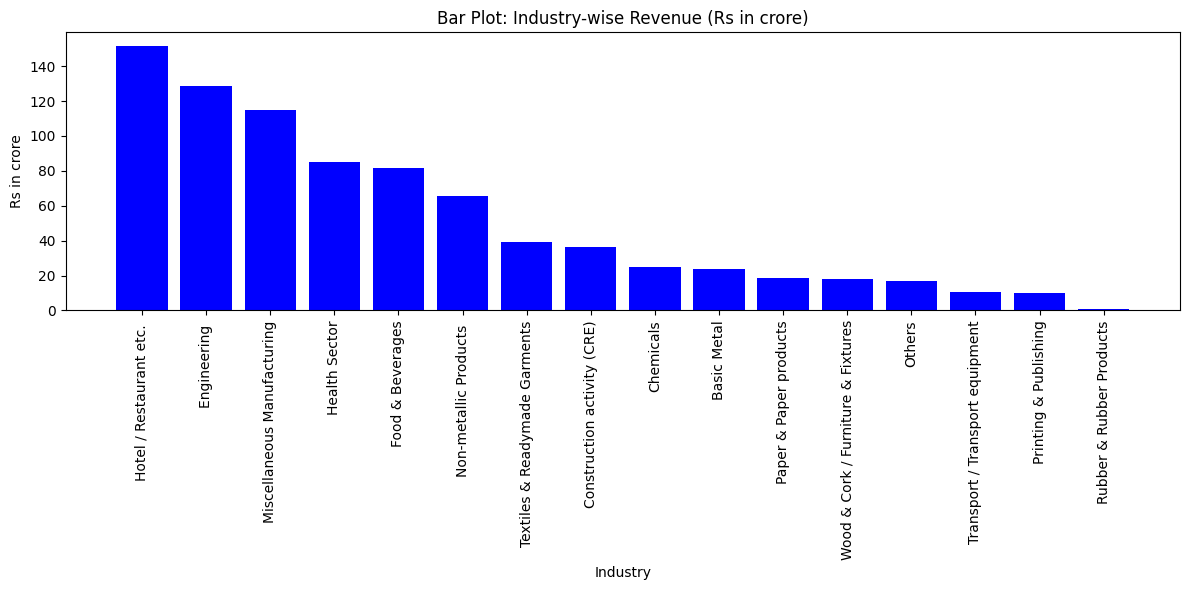

In [32]:
df_sorted = pandas_df.sort_values(by='Rs in crore', ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(df_sorted['Industry'], df_sorted['Rs in crore'], color='blue')  # User explicitly requested blue
plt.xticks(rotation=90)
plt.title('Bar Plot: Industry-wise Revenue (Rs in crore)')
plt.xlabel('Industry')
plt.ylabel('Rs in crore')
plt.tight_layout()
plt.show()

#### This code generates a bar plot representing the revenue (Rs in crore) of each industry

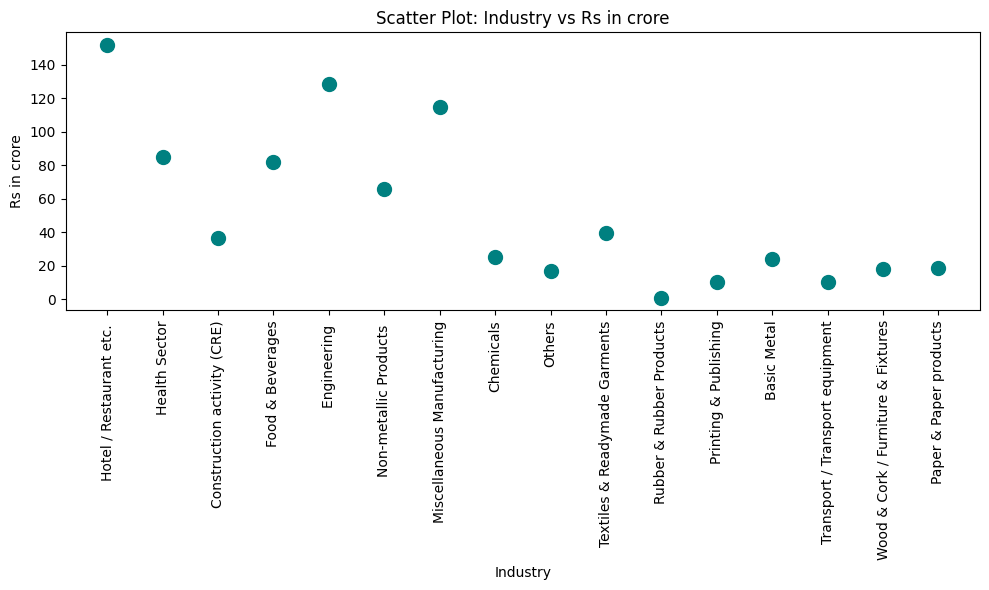

In [33]:
plt.figure(figsize=(10, 6))
plt.scatter(pandas_df['Industry'], pandas_df['Rs in crore'], color='teal', s=100)
plt.xticks(rotation=90)
plt.title('Scatter Plot: Industry vs Rs in crore')
plt.xlabel('Industry')
plt.ylabel('Rs in crore')
plt.tight_layout()
plt.show()

 #### This scatter plot visually shows how much funding (Rs in crore) each industry has. It is useful for identifying patterns, outliers, or trends in funding distribution across industries.

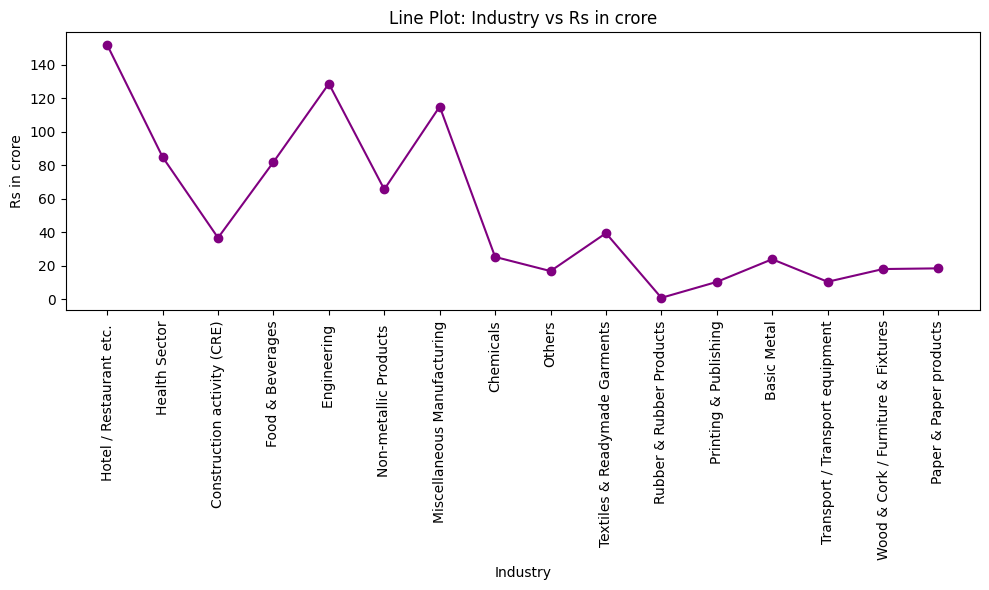

In [34]:
plt.figure(figsize=(10, 6))
plt.plot(pandas_df['Industry'], pandas_df['Rs in crore'], marker='o', linestyle='-', color='purple')
plt.xticks(rotation=90)
plt.title('Line Plot: Industry vs Rs in crore')
plt.xlabel('Industry')
plt.ylabel('Rs in crore')
plt.tight_layout()
plt.show()


#### This plot helps visualize the variation or trend in monetary values (Rs in crore) across different industries, making it easy to identify high or low values and compare industries at a glance.

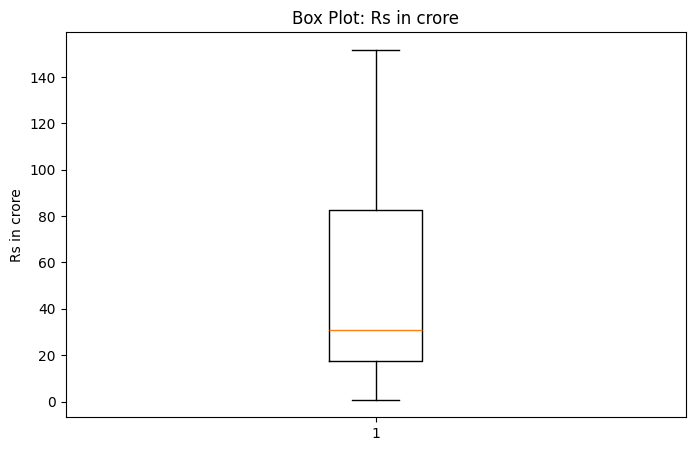

In [35]:
data = pandas_df['Rs in crore'].dropna()
plt.figure(figsize=(8, 5))
plt.boxplot(data)
plt.title('Box Plot: Rs in crore')
plt.ylabel('Rs in crore')
plt.show()

#### This boxplot helps to summarize the overall distribution, detect outliers, and understand data spread for "Rs in crore" at a glance.

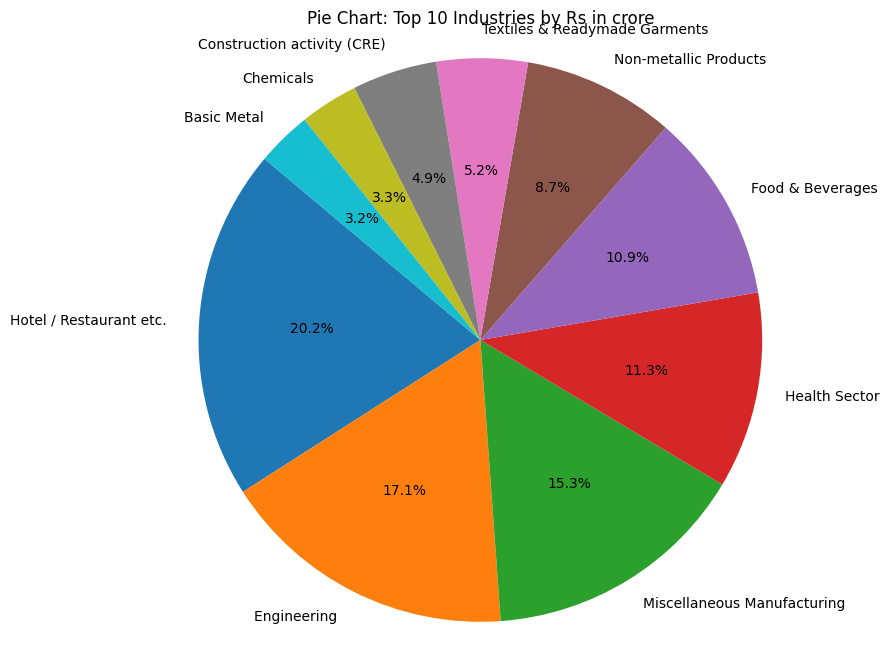

In [36]:
df_sorted = df.orderBy('Rs in crore', ascending=False).limit(10)
top10 = df_sorted.toPandas()
plt.figure(figsize=(8, 8))
plt.pie(top10['Rs in crore'], labels=top10['Industry'], autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart: Top 10 Industries by Rs in crore')
plt.axis('equal') 
plt.show()


#### This pie chart helps visually compare the proportion of total Rs in crore contributed by the top 10 industries in an easy-to-understand circular format.

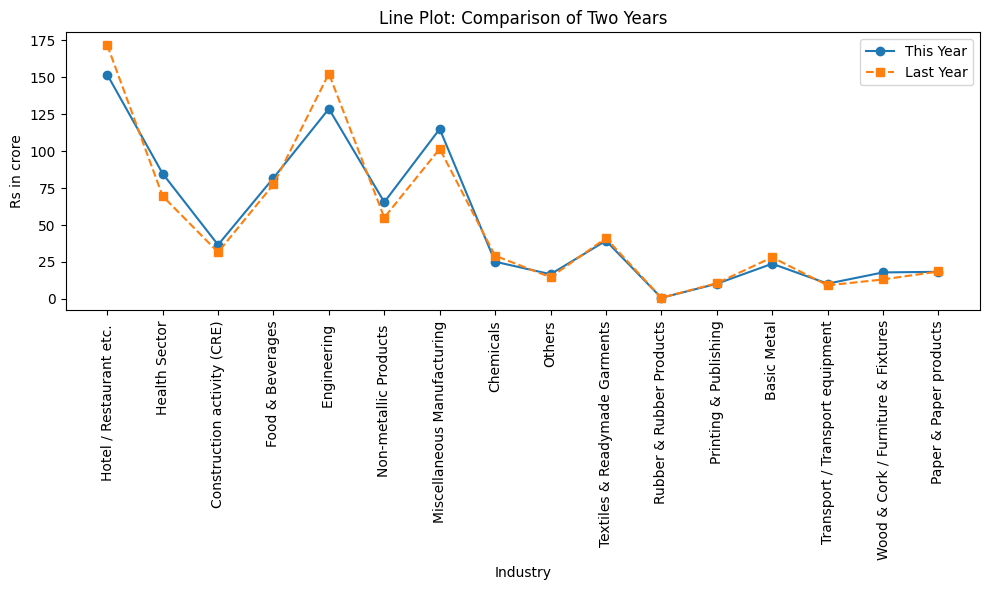

In [37]:
from pyspark.sql.functions import rand, col
df = df.withColumn('Rs_Last_Year', col('Rs in crore') * (rand() * 0.5 + 0.7))
pandas_df = df.toPandas()
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(pandas_df['Industry'], pandas_df['Rs in crore'], label='This Year', marker='o')
plt.plot(pandas_df['Industry'], pandas_df['Rs_Last_Year'], label='Last Year', marker='s', linestyle='--')
plt.xticks(rotation=90)
plt.title('Line Plot: Comparison of Two Years')
plt.xlabel('Industry')
plt.ylabel('Rs in crore')
plt.legend()
plt.tight_layout()
plt.show()


#### This plot helps you visually compare performance across two years, observe growth trends or drops in funding, and identify industry-wise changes over time.

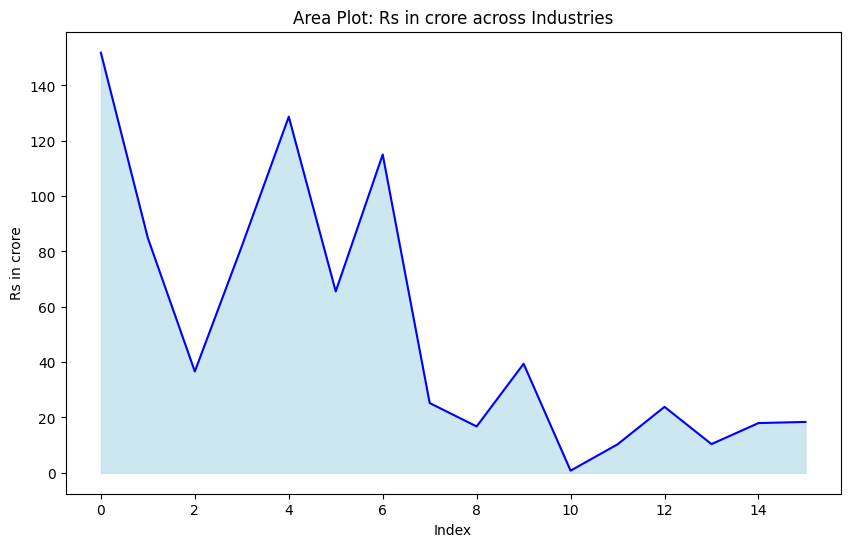

In [38]:
plt.figure(figsize=(10, 6))
plt.fill_between(pandas_df.index, pandas_df['Rs in crore'], color='lightblue', alpha=0.6)
plt.plot(pandas_df['Rs in crore'], color='blue')
plt.title('Area Plot: Rs in crore across Industries')
plt.xlabel('Index')
plt.ylabel('Rs in crore')
plt.show()

#### This area chart provides a visual impression of the magnitude and trend of "Rs in crore" values across industries. Helps in identifying peaks and dips, giving an overall sense of data distribution over index positions.

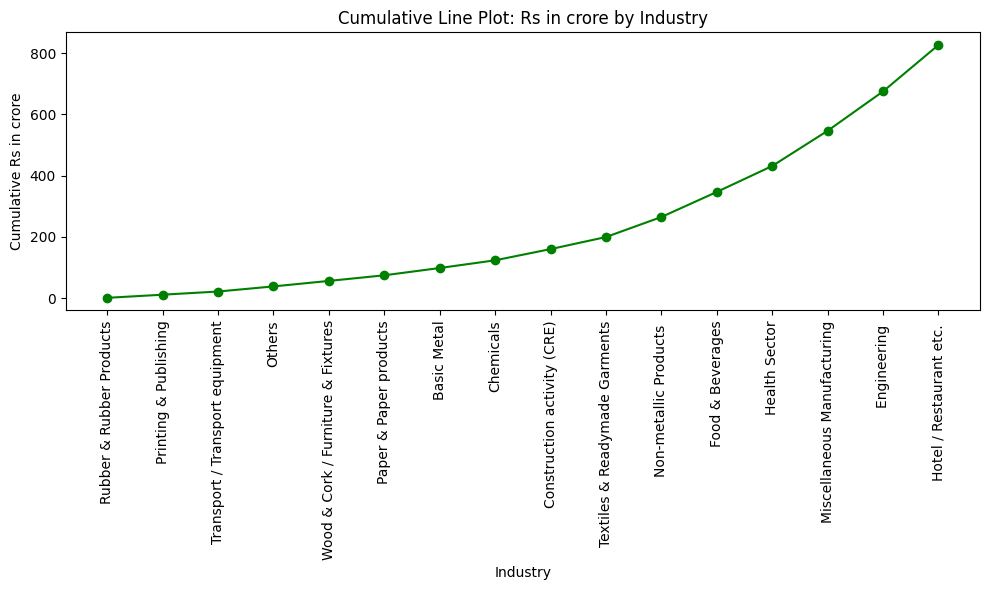

In [39]:
df_sorted = df.orderBy('Rs in crore')
pandas_df = df_sorted.toPandas()
pandas_df['Cumulative'] = pandas_df['Rs in crore'].cumsum()
plt.figure(figsize=(10, 6))
plt.plot(pandas_df['Industry'], pandas_df['Cumulative'], marker='o', color='green')
plt.xticks(rotation=90)
plt.title('Cumulative Line Plot: Rs in crore by Industry')
plt.xlabel('Industry')
plt.ylabel('Cumulative Rs in crore')
plt.tight_layout()
plt.show()


#### This cumulative plot helps you understand how total funding builds up across different industries.You can easily identify which industries contribute most to the cumulative total, especially toward the end of the plot. 

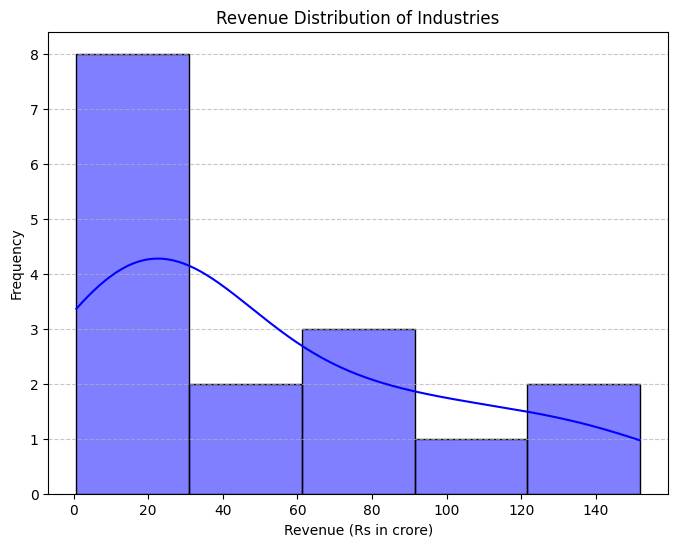

In [40]:
pandas_df = df.select("Rs in crore").toPandas()

plt.figure(figsize=(8, 6))
sns.histplot(pandas_df["Rs in crore"], bins=5, kde=True, color='blue')
plt.title("Revenue Distribution of Industries")
plt.xlabel("Revenue (Rs in crore)")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


#### This histogram shows how the revenues are distributed across industries ,  it suggests that most industries have lower revenues, with a few industries having very high revenues.

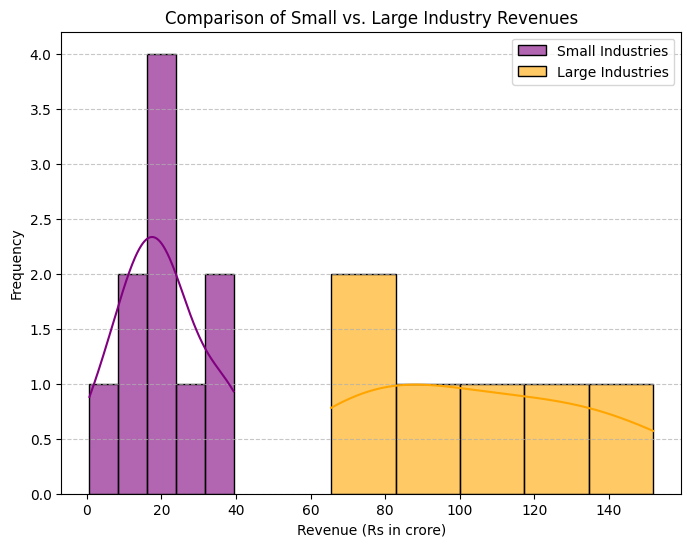

In [42]:
pandas_df = df.select("Rs in crore").toPandas()

small_industries = pandas_df[pandas_df["Rs in crore"] < 50]
large_industries = pandas_df[pandas_df["Rs in crore"] >= 50]

plt.figure(figsize=(8, 6))
sns.histplot(small_industries["Rs in crore"], bins=5, kde=True, color='purple', label="Small Industries", alpha=0.6)
sns.histplot(large_industries["Rs in crore"], bins=5, kde=True, color='orange', label="Large Industries", alpha=0.6)

plt.legend()
plt.title("Comparison of Small vs. Large Industry Revenues")
plt.xlabel("Revenue (Rs in crore)")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


#### This histogram compares the revenue distribution of small industries (below ₹50 crore) and large industries (₹50 crore and above). The purple bars represent small industries, while the orange bars represent large industries. If one group has a higher frequency, it indicates that more industries fall within that revenue range. 

C:\Users\bunny\AppData\Local\Temp\ipykernel_23072\104391935.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="Industry", x="Rs in crore", data=pandas_df, palette="viridis")


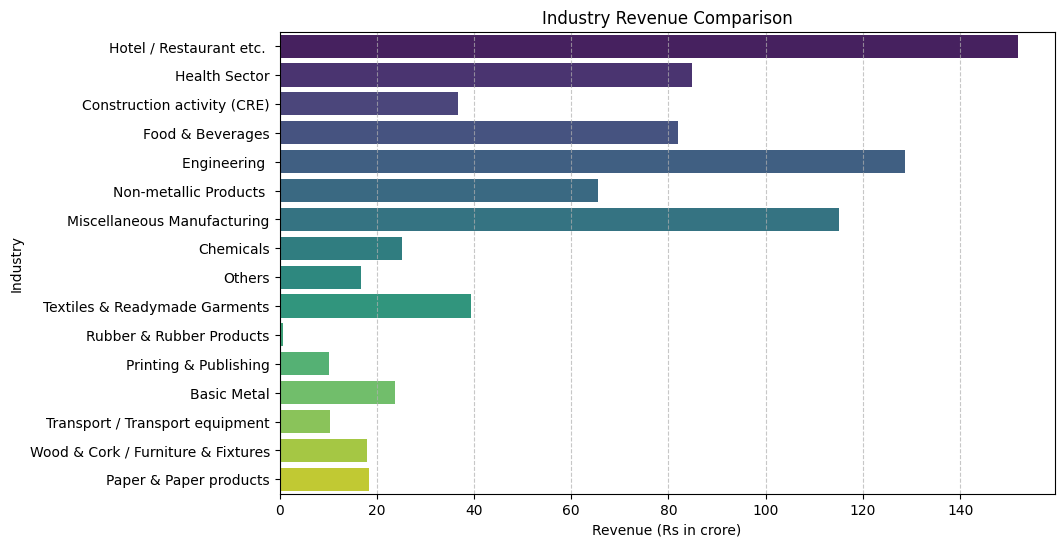

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

pandas_df = df.select("Industry", "Rs in crore").toPandas()

plt.figure(figsize=(10, 6))
sns.barplot(y="Industry", x="Rs in crore", data=pandas_df, palette="viridis")
plt.title("Industry Revenue Comparison")
plt.xlabel("Revenue (Rs in crore)")
plt.ylabel("Industry")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


#### This bar chart compares the revenues of different industries,Industries with the highest revenue can be quickly identified as the longest bars,Smaller bars indicate industries with lower revenue

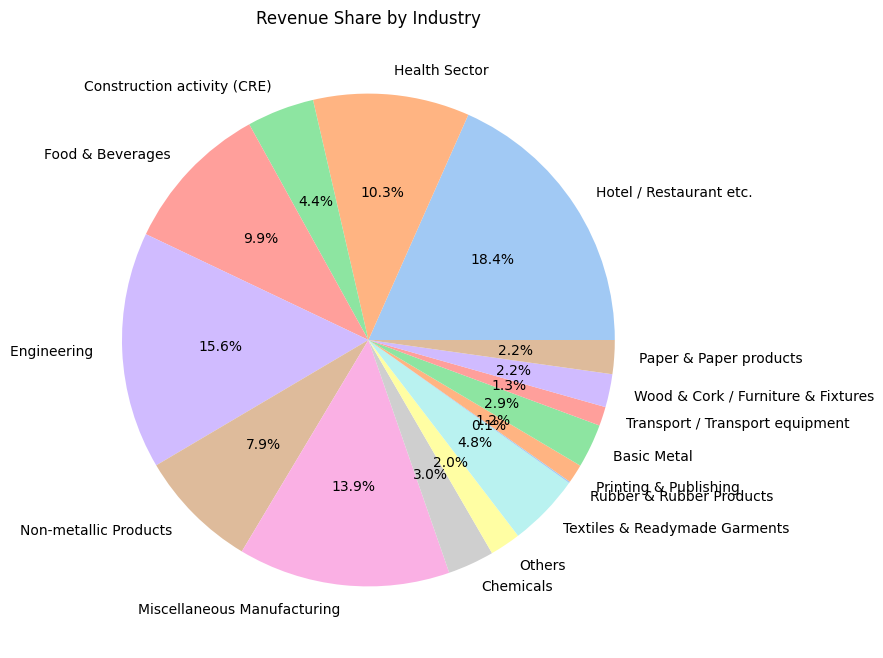

In [46]:
pandas_df = df.select("Industry", "Rs in crore").toPandas()

plt.figure(figsize=(8, 8))
plt.pie(
    pandas_df["Rs in crore"], 
    labels=pandas_df["Industry"], 
    autopct='%1.1f%%', 
    colors=sns.color_palette("pastel")
)
plt.title("Revenue Share by Industry")
plt.show()


#### This pie chart shows the proportion of total revenue contributed by each industry ,few industries occupy most of the pie, it indicates that a few industries dominate revenue generation.

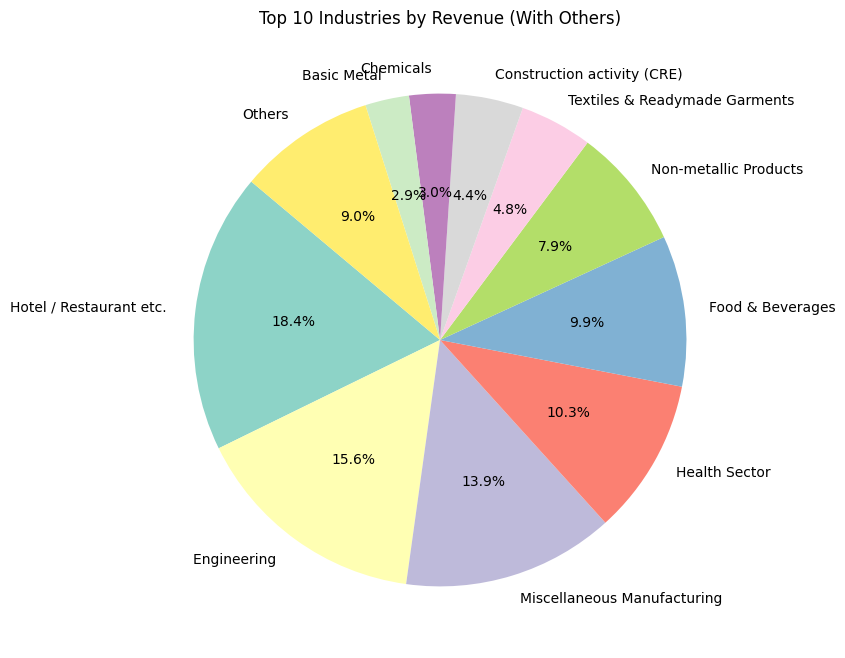

In [47]:
pandas_df = df.toPandas()


df_grouped = pandas_df.groupby("Industry")["Rs in crore"].sum()
top_10 = df_grouped.nlargest(10)
others = df_grouped.sum() - top_10.sum()

top_10["Others"] = others

plt.figure(figsize=(8, 8))
top_10.plot.pie(
    autopct='%1.1f%%',
    startangle=140,
    cmap="Set3"
)
plt.title("Top 10 Industries by Revenue (With Others)")
plt.ylabel("")  # Removes y-label clutter
plt.show()


#### This pie chart represents the share of total revenue contributed by the top 10 industries, with the remaining industries grouped as "Others." The larger sections indicate that a few industries generate the majority of the revenue, while smaller industries contribute comparatively less.

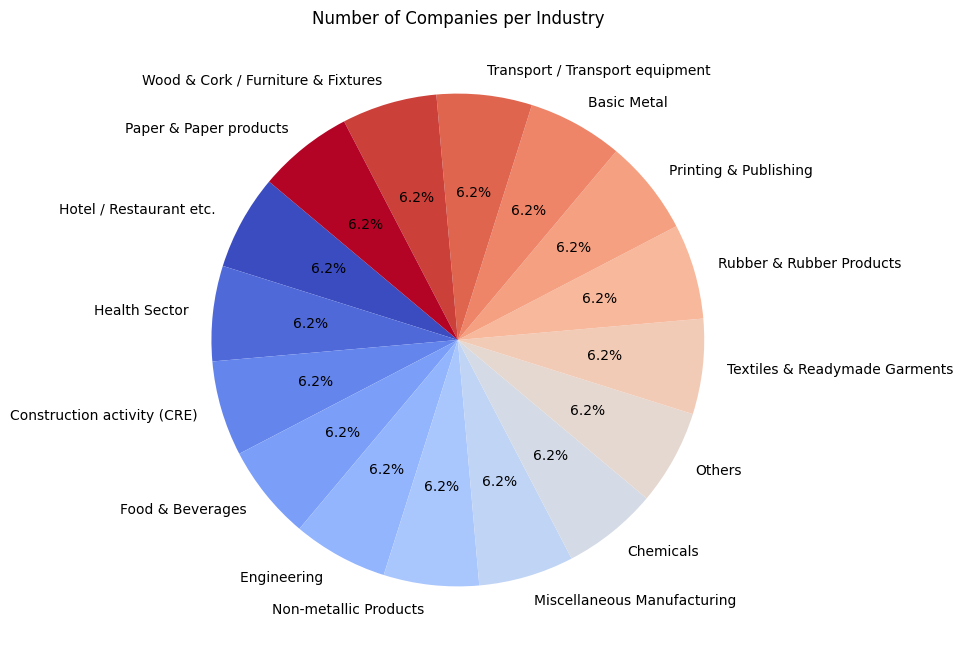

In [48]:
pandas_df = df.toPandas()

df_count = pandas_df["Industry"].value_counts()

plt.figure(figsize=(8, 8))
df_count.plot.pie(
    autopct='%1.1f%%', 
    startangle=140, 
    cmap="coolwarm"
)
plt.title("Number of Companies per Industry")
plt.ylabel("")  # Remove default label
plt.show()


#### This pie chart visually shows how many companies belong to each industry. Each slice represents an industry, and its size is proportional to the number of companies in that industry.

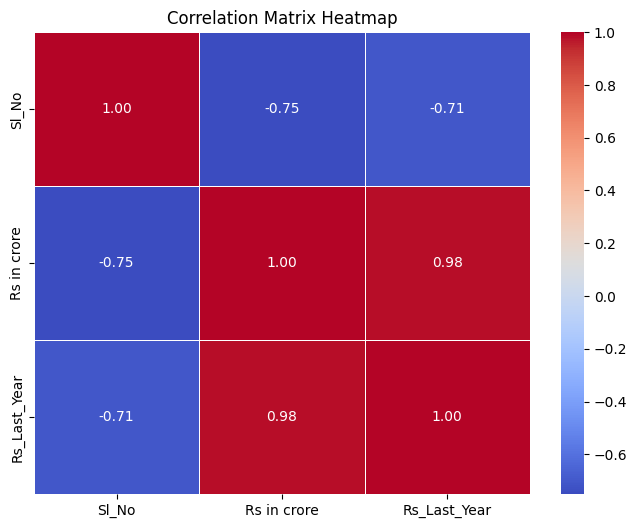

In [49]:
pandas_df = df.toPandas()

correlation_matrix = pandas_df.corr(numeric_only=True)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

#### Helps in identifying relationships and dependencies between numeric variables.Useful for feature selection, data exploration, or detecting multicollinearity in datasets.

+-----+--------------------+-----------+------------------+--------+
|Sl_No|            Industry|Rs in crore|      Rs_Last_Year|Category|
+-----+--------------------+-----------+------------------+--------+
|    1|Hotel / Restauran...|     151.81|171.87577707086044|    High|
|    2|       Health Sector|      84.83| 69.57945338022095|    High|
|    3|Construction acti...|      36.61|31.650674880288076|    High|
|    4|    Food & Beverages|      81.87|  77.4912404761457|    High|
|    5|        Engineering |     128.69|152.49339344841187|    High|
|    6|Non-metallic Prod...|      65.53|55.044710500790615|    High|
|    7|Miscellaneous Man...|     115.02|101.60712153005426|    High|
|    8|           Chemicals|      25.19|29.252417889912323|     Low|
|    9|              Others|      16.73|14.684805325086437|     Low|
|   10|Textiles & Readym...|      39.38| 41.09881855768667|    High|
|   11|Rubber & Rubber P...|       0.75|0.8135977374076718|     Low|
|   12|Printing & Publis...|      

C:\Users\bunny\AppData\Local\Temp\ipykernel_23072\3705149344.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y='Rs in crore', data=pandas_df, palette='Set2')


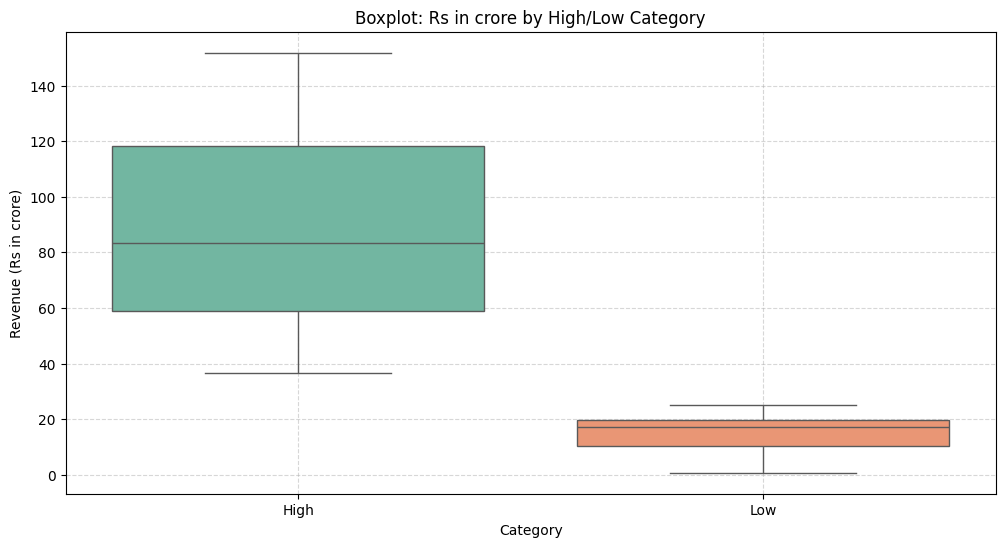

In [54]:
from pyspark.sql.functions import col, when

median_value = df.approxQuantile("Rs in crore", [0.5], 0.01)[0]

df = df.withColumn("Category", when(col("Rs in crore") > median_value, "High").otherwise("Low"))

df.show()

pandas_df = df.select("Rs in crore", "Category").toPandas()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Category', y='Rs in crore', data=pandas_df, palette='Set2')
plt.title('Boxplot: Rs in crore by High/Low Category')
plt.xlabel('Category')
plt.ylabel('Revenue (Rs in crore)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


#### This plot gives a quick comparison of value distributions between high and low funding groups.Makes it easy to see how spread, median, and outliers differ between the two categories.

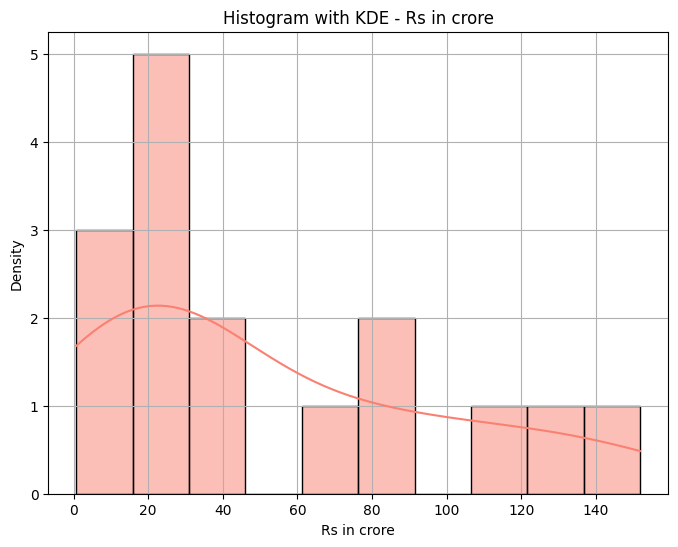

In [55]:
pandas_df = df.select("Rs in crore").toPandas()

plt.figure(figsize=(8, 6))
sns.histplot(pandas_df['Rs in crore'], kde=True, bins=10, color='salmon')
plt.title('Histogram with KDE - Rs in crore')
plt.xlabel('Rs in crore')
plt.ylabel('Density')
plt.grid(True)
plt.show()

#### This plot helps to understand the shape, spread, and skewness of the "Rs in crore" data.The KDE line shows a smoothed estimate of the probability density, giving more insights beyond just the bar frequencies

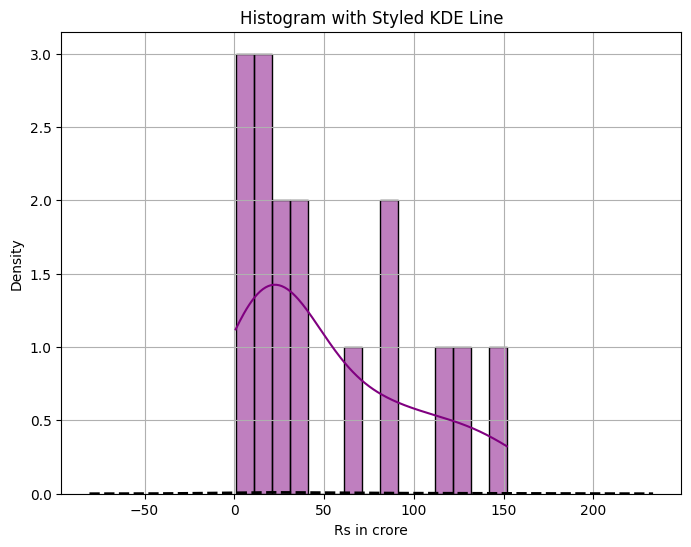

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns


pandas_df = df.select("Rs in crore").toPandas()

plt.figure(figsize=(8, 6))
sns.histplot(pandas_df['Rs in crore'], kde=True, bins=15, color='purple')

sns.kdeplot(pandas_df['Rs in crore'], linestyle='--', linewidth=2, color='black')

plt.title('Histogram with Styled KDE Line')
plt.xlabel('Rs in crore')
plt.ylabel('Density')
plt.grid(True)
plt.show()


#### This plot allows you to clearly observe:Distribution shape,Peak concentration areas,Spread and skewness.The styled KDE line makes it easier to differentiate the smooth density trend from the histogram bars.

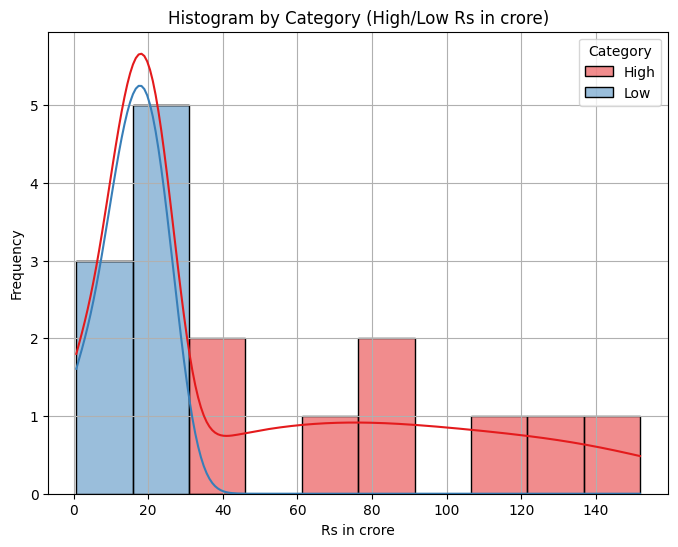

In [58]:
from pyspark.sql.functions import when, col

median_value = df.approxQuantile("Rs in crore", [0.5], 0.01)[0]

df = df.withColumn("Category", when(col("Rs in crore") > median_value, "High").otherwise("Low"))

pandas_df = df.select("Rs in crore", "Category").toPandas()

plt.figure(figsize=(8, 6))
sns.histplot(data=pandas_df, x='Rs in crore', hue='Category', bins=10, kde=True, palette='Set1', multiple='stack')
plt.title('Histogram by Category (High/Low Rs in crore)')
plt.xlabel('Rs in crore')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


#### This plot helps in comparing how "High" and "Low" categories are distributed across different ranges of "Rs in crore".You can visually assess which category dominates in which range and how their distributions overlap or differ.


## Hypothesis Testing


### We perform statistical tests, including T-tests, to analyze the significance of differences in various categories.


In [59]:
from scipy import stats

In [61]:
desc_stats = df.describe("Rs in crore").toPandas()
print(desc_stats)


  summary        Rs in crore
0   count                 16
1    mean  51.69562500000001
2  stddev  47.26905710486865
3     min               0.75
4     max             151.81


#### This summary provides key statistics about industry revenue. It includes the average revenue (mean), median (50% value), minimum and maximum revenues, and standard deviation, which shows how much revenues vary across industries. A high standard deviation indicates large differences between industries, while a small range suggests similar revenues.

In [62]:
t_stat, p_value = stats.ttest_1samp(data, 100)

(t_stat, p_value)

(np.float64(-4.087610623823906), np.float64(0.0009703322797434481))

#### This t-test checks whether the average industry revenue is significantly different from ₹100 crore. A high p-value (greater than 0.05) suggests no significant difference, while a low p-value (less than 0.05) indicates that the industry revenue is significantly different from ₹100 crore. The t-statistic shows how far the sample mean deviates from the hypothesized value.

# Data Analysis Report: Industry-wise Sanctions Dataset
## Introduction
### This report presents an in-depth analysis of an industry-wise financial dataset, focusing on revenue distribution, top-performing sectors, comparative trends, and categorical insights based on revenue brackets.

## Data Cleaning and Preprocessing
### Missing values were handled and inconsistencies were removed.
### Column names were cleaned and standardized for consistency.
### Data types (numerical and categorical) were validated and corrected as needed.
## Statistical Summary
### Descriptive Statistics:
### Provided summary metrics such as mean, median, standard deviation, and data distribution for Rs in crore.
### Correlation Analysis:
### A correlation matrix heatmap was used to visualize relationships between numerical attributes like Rs in crore, Rs Last Year, etc.
## Data Visualizations
## Pie Charts
### Top 10 Industries by Revenue: Showed the proportional contribution of leading industries to the total revenue.
### Revenue Distribution by Industry Category (High/Low): Highlighted how much each revenue category contributes to the total.
## Box Plots
### Boxplot of Rs in crore (Overall): Visualized the overall spread, outliers, and distribution of revenue.
### Boxplot of Rs in crore by Industry: Showed revenue variability within and across selected industries.
### Boxplot by High/Low Category: Compared revenue distribution between high and low revenue sectors.
## Histograms
### Distribution of Rs in crore: Showed the frequency of revenue values across industries.
### Histogram with KDE Overlay: Added smooth density curves to understand distribution trends.
### Stacked Histogram by Category: Illustrated how High/Low categories are distributed across revenue bins.
## Line Plots
### Industry-wise Revenue Trends: Visualized revenue trends across industries.
### Comparison of Rs in crore (Current vs. Last Year): Highlighted year-over-year changes in industry performance.
### Cumulative Revenue Plot: Showed total revenue growth across sorted industries.
## Area Plot
### Area Chart for Rs in crore: Visualized the overall financial coverage across industries using a filled line chart.
## Conclusion
### This analysis delivers valuable insights into revenue distribution, industry performance, and categorical trends based on financial strength. The visualizations help in:
### Identifying top revenue-generating sectors,
### Highlighting underperforming industries,
### Analyzing year-over-year performance trends, and
### Understanding distribution variability across sectors.
